In [96]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import paths
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
plt.style.use('seaborn-v0_8-whitegrid')

In [97]:
expfolder = paths.sample_derivatives / "cust_kmeans_dist-correlation_ttype-percentage_tvalue-15_k-4_ninits-50_activation-pos_n-355"
metrics_df_path = expfolder / paths.metrics_per_subject_df_name
metrics_df = pd.read_pickle(metrics_df_path)
metrics_df

TPM  \
                                                                 0   
subj_name                                                            
sub-CC00060XX03  [[0.7335080821319353, 0.05504587155963303, 0.0...   
sub-CC00064XX07  [[0.7304499781564002, 0.054608999563128, 0.027...   
sub-CC00067XX10  [[0.7584097859327217, 0.03582350371341197, 0.0...   
sub-CC00068XX11  [[0.7605941459152469, 0.03145478374836173, 0.0...   
sub-CC00069XX12  [[0.7658366098733072, 0.036260375709917, 0.021...   
...                                                            ...   
sub-CC01200XX04  [[0.7597204019222368, 0.037570991699432066, 0....   
sub-CC01211XX07  [[0.762341633901267, 0.04412407164700743, 0.02...   
sub-CC01215XX11  [[0.7771952817824378, 0.03058103975535168, 0.0...   
sub-CC01223XX11  [[0.743993010048056, 0.033202271734381825, 0.0...   
sub-CC01236XX16  [[0.744866754041066, 0.03713411970292704, 0.03...   

                         nxGraph CAPEntriesFromBaseline                      \
                               0                      0         1         2   
subj_name                                                                     
sub-CC00060XX03  (0, 1, 2, 3, 4)               0.733508  0.055046  0.025339   
sub-CC00064XX07  (0, 1, 2, 3, 4)               0.730450  0.054609  0.027960   
sub-CC00067XX10  (0, 1, 2, 3, 4)               0.758410  0.035824  0.024465   
sub-CC00068XX11  (0, 1, 2, 3, 4)               0.760594  0.031455  0.022717   
sub-CC00069XX12  (0, 1, 2, 3, 4)               0.765837  0.036260  0.021844   
...                          ...                    ...       ...       ...   
sub-CC01200XX04  (0, 1, 2, 3, 4)               0.759720  0.037571  0.024028   
sub-CC01211XX07  (0, 1, 2, 3, 4)               0.762342  0.044124  0.026649   
sub-CC01215XX11  (0, 1, 2, 3, 4)               0.777195  0.030581  0.010922   
sub-CC01223XX11  (0, 1, 2, 3, 4)               0.743993  0.033202  0.033202   
sub-CC01236XX16  (0, 1, 2, 3, 4)               0.744867  0.037134  0.032765   

                                    CAPExitsToBaseline                      \
                        3         4                  0         1         2   
subj_name                                                                    
sub-CC00060XX03  0.013106  0.023154           0.733508  0.055046  0.025775   
sub-CC00064XX07  0.018785  0.018349           0.730450  0.054609  0.031018   
sub-CC00067XX10  0.020970  0.010485           0.758410  0.035824  0.025339   
sub-CC00068XX11  0.013543  0.021844           0.760594  0.031018  0.025339   
sub-CC00069XX12  0.017912  0.008301           0.765837  0.035387  0.024028   
...                   ...       ...                ...       ...       ...   
sub-CC01200XX04  0.013106  0.015727           0.759720  0.037134  0.024028   
sub-CC01211XX07  0.012232  0.004806           0.762342  0.046308  0.025775   
sub-CC01215XX11  0.010485  0.020970           0.777195  0.031018  0.010922   
sub-CC01223XX11  0.021844  0.017912           0.743993  0.031455  0.036697   
sub-CC01236XX16  0.015291  0.020096           0.744867  0.037571  0.032765   

                 ...                              seq_lengths_per_state  \
                 ...                                                  0   
subj_name        ...                                                      
sub-CC00060XX03  ...  [0.392, 0.392, 0.392, 0.392, 0.392, 0.392, 0.3...   
sub-CC00064XX07  ...  [0.392, 0.392, 0.392, 0.392, 0.392, 0.392, 0.3...   
sub-CC00067XX10  ...  [0.392, 0.392, 0.392, 0.392, 0.392, 0.392, 0.3...   
sub-CC00068XX11  ...  [1.568, 0.392, 0.392, 0.784, 0.392, 0.392, 0.3...   
sub-CC00069XX12  ...  [1.1760000000000002, 0.392, 0.392, 0.784, 0.78...   
...              ...                                                ...   
sub-CC01200XX04  ...  [0.392, 0.392, 1.568, 0.784, 0.392, 0.392, 0.3...   
sub-CC01211XX07  ...  [1.568, 0.392, 0.392, 0.392, 0.392, 0.392, 0.3...   
sub-CC01215XX11  ...  [0.392, 0.392, 0.392, 0.392, 0.392,

In [98]:
subjs_infos = paths.bids_root / "combined.tsv"
subjs_infos = pd.read_csv(subjs_infos, sep="\t")
subjs_infos

,participant_id,session_id,scan_number,singleton,sedation,birth_age,scan_age,sex,birth_weight,head_circumference_scan,...,qc_fmri_fieldmap_type,qc_fmri_dvars_z,qc_fmri_tsnr_z,qc_fmri_mcdc2sbref_z,qc_fmri_sbref2struct_z,qc_fmri_fmap2struct_z,qc_fmri_standard2struct_z,qc_fmri_flagged,qc_fmri_comment,qc_smri_pipeline_status
0,CC00050XX01,7201,1,S,False,43.000000,43.29,female,3.910,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full
1,CC00051XX02,7702,1,S,False,39.857143,40.00,female,3.310,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full
2,CC00052XX03,8300,1,S,False,38.000000,38.71,female,2.640,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full
3,CC00053XX04,8607,1,S,False,40.000000,40.43,female,3.460,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full
4,CC00054XX05,8800,1,S,False,41.857143,42.14,male,3.690,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,CC01232BN12,152130,1,M,False,35.000000,35.43,female,2.140,30.1,...,spin_echo_epi,1.149254,0.655733,1.852760,1.716708,0.556462,0.778163,False,NaN,full
883,CC01234AN14,155030,1,M,False,32.857143,33.29,female,2.280,30.5,...,dual_echo_time,-0.446718,-0.591990,1.563579,1.603737,2.113433,4.689710,False,corrupted spinecho,full
884,CC01234BN14,155230,1,M,False,32.857143,33.43,female,2.150,31.0,...,spin_echo_epi,0.223027,-0.246356,2.395129,1.663545,2.136479,4.685564,False,NaN,full
885,CC01236XX16,155830,1,S,False,40.714286,44.43,female,3.675,36.5,...,spin_echo_epi,-0.274686,0.576533,-0.094599,0.511690,0.281604,-1.325503,False,NaN,full


In [99]:
# add sub- prefix to participand_id column
subjs_infos['participant_id'] = subjs_infos['participant_id'].apply(lambda x: f"sub-{x}")
columns_to_keep = [
    'participant_id',
    'session_id',
    'sedation',
    'birth_age',
    'scan_age',
    'sex',
]
# drop non wanted columns
subjs_infos = subjs_infos[columns_to_keep]

# check that all subjs from metrics_df are in subjs_infos
fullgroup_subjs = metrics_df.index.get_level_values('subj_name').unique()
cohort_subjs = subjs_infos['participant_id'].unique()
assert set(fullgroup_subjs).issubset(set(cohort_subjs))

# show subjects from fullgroup_subjs that appear multiple times in subjs_infos
for subj in fullgroup_subjs:
    n_appearances = sum(subjs_infos['participant_id'] == subj)
    if n_appearances > 1:
        display(subjs_infos[subjs_infos['participant_id'] == subj])

# get df with infos for subjects in metrics_df
subjs_infos_df = subjs_infos[subjs_infos['participant_id'].isin(fullgroup_subjs)].set_index('participant_id')
# for subjects in duplicates, keep only the first appearance
subjs_infos_df = subjs_infos_df[~subjs_infos_df.index.duplicated(keep='first')]

# make each column of subjs_infos_df a multiindex with first level the column name, second level 0
subjs_infos_df.columns = pd.MultiIndex.from_tuples([(col, 0) for col in subjs_infos_df.columns])

# join metrics_df with subjs_infos_df, raise error if index are not the same
metrics_metadata_df = pd.concat([metrics_df, subjs_infos_df], axis=1, join='inner', ignore_index=False, keys=['metrics', 'metadata'], verify_integrity=True)
metrics_metadata_df

,participant_id,session_id,sedation,birth_age,scan_age,sex
623,sub-CC00769XX19,4400,False,40.714286,41.0,male
624,sub-CC00769XX19,6410,False,40.714286,42.0,male


metrics  \
                                                               TPM   
                                                                 0   
sub-CC00060XX03  [[0.7335080821319353, 0.05504587155963303, 0.0...   
sub-CC00064XX07  [[0.7304499781564002, 0.054608999563128, 0.027...   
sub-CC00067XX10  [[0.7584097859327217, 0.03582350371341197, 0.0...   
sub-CC00068XX11  [[0.7605941459152469, 0.03145478374836173, 0.0...   
sub-CC00069XX12  [[0.7658366098733072, 0.036260375709917, 0.021...   
...                                                            ...   
sub-CC01200XX04  [[0.7597204019222368, 0.037570991699432066, 0....   
sub-CC01211XX07  [[0.762341633901267, 0.04412407164700743, 0.02...   
sub-CC01215XX11  [[0.7771952817824378, 0.03058103975535168, 0.0...   
sub-CC01223XX11  [[0.743993010048056, 0.033202271734381825, 0.0...   
sub-CC01236XX16  [[0.744866754041066, 0.03713411970292704, 0.03...   

                                                                             \
                         nxGraph CAPEntriesFromBaseline                       
                               0                      0         1         2   
sub-CC00060XX03  (0, 1, 2, 3, 4)               0.733508  0.055046  0.025339   
sub-CC00064XX07  (0, 1, 2, 3, 4)               0.730450  0.054609  0.027960   
sub-CC00067XX10  (0, 1, 2, 3, 4)               0.758410  0.035824  0.024465   
sub-CC00068XX11  (0, 1, 2, 3, 4)               0.760594  0.031455  0.022717   
sub-CC00069XX12  (0, 1, 2, 3, 4)               0.765837  0.036260  0.021844   
...                          ...                    ...       ...       ...   
sub-CC01200XX04  (0, 1, 2, 3, 4)               0.759720  0.037571  0.024028   
sub-CC01211XX07  (0, 1, 2, 3, 4)               0.762342  0.044124  0.026649   
sub-CC01215XX11  (0, 1, 2, 3, 4)               0.777195  0.030581  0.010922   
sub-CC01223XX11  (0, 1, 2, 3, 4)               0.743993  0.033202  0.033202   
sub-CC01236XX16  (0, 1, 2, 3, 4)               0.744867  0.037134  0.032765   

                                                                            \
                                    CAPExitsToBaseline                       
                        3         4                  0         1         2   
sub-CC00060XX03  0.013106  0.023154           0.733508  0.055046  0.025775   
sub-CC00064XX07  0.018785  0.018349           0.730450  0.054609  0.031018   
sub-CC00067XX10  0.020970  0.010485           0.758410  0.035824  0.025339   
sub-CC00068XX11  0.013543  0.021844           0.760594  0.031018  0.025339   
sub-CC00069XX12  0.017912  0.008301           0.765837  0.035387  0.024028   
...                   ...       ...                ...       ...       ...   
sub-CC01200XX04  0.013106  0.015727           0.759720  0.037134  0.024028   
sub-CC01211XX07  0.012232  0.004806           0.762342  0.046308  0.025775   
sub-CC01215XX11  0.010485  0.020970           0.777195  0.031018  0.010922   
sub-CC01223XX11  0.021844  0.017912           0.743993  0.031455  0.036697   
sub-CC01236XX16  0.015291  0.020096           0.744867  0.037571  0.032765   

                 ...                                                        \
                 ... avg_state_len                                           
                 ...             0         1         2         3         4   
sub-CC00060XX03  ...      0.468345  2.150149  3.861200  3.773000  1.991613   
sub-CC00064XX07  ...      0.434920  2.586606  3.015385  2.399040  1.668085   
sub-CC00067XX10  ...      0.522667  3.436000  3.675000  1.642667  3.477419   
sub-CC00068XX11  ...      0.546888  2.447610  5.821200  2.333767  1.895738   
sub-CC00069XX12  ...      0.548394  3.454769  5.089467  2.842000  0.799077   
...              ...           ...       ...       ...       ...       ...   
sub-CC01200XX04  ...      0.545391  3.354227  3.508400  4.135600  1.781043   
sub-CC01211XX07  ...      0.538269  3.174847  4.131474  2.030359  2.090667   
sub-CC01215XX11  ...

In [113]:
metrics_metadata_df[("metadata", "rounded_scan_age", 0)] =  metrics_metadata_df[("metadata", "scan_age", 0)].round()
age_groups = metrics_metadata_df.groupby(metrics_metadata_df["metadata", "rounded_scan_age", 0])
age_groups.size()

(metadata, rounded_scan_age, 0)
female    165
male      190
dtype: int64

In [114]:
# subplots: each row correspond to a cap (5 rows) and each column to a metric. each plot is has for each age group the mean value of its metric with error bars as std
metrics_to_plot = [
        "CAPEntriesFromBaseline",
        "CAPExitsToBaseline",
        "CAPResilience" ,
        "CAPInDegree",
        "CAPOutDegree",
        "frameCountsPerCAP",
        "n_seq_per_state",
        "avg_state_len",
    ]

aggregated_data = defaultdict(lambda: defaultdict(dict))
# structure : aggregated_data[metric][cap_id] = {age_group_name: [list of subject values]}
for age_group_name, age_group_df in age_groups:
    print(f"Age group: {age_group_name}, n subjects: {len(age_group_df)}")
    for metric in metrics_to_plot:
        metric_df = age_group_df[("metrics", metric)]
        for cap_id in metric_df.columns:
            aggregated_data[metric][cap_id][age_group_name] = metric_df[cap_id].values

Age group: female, n subjects: 165
Age group: male, n subjects: 190


/tmp/ipykernel_3626/3241829357.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  metric_df = age_group_df[("metrics", metric)]


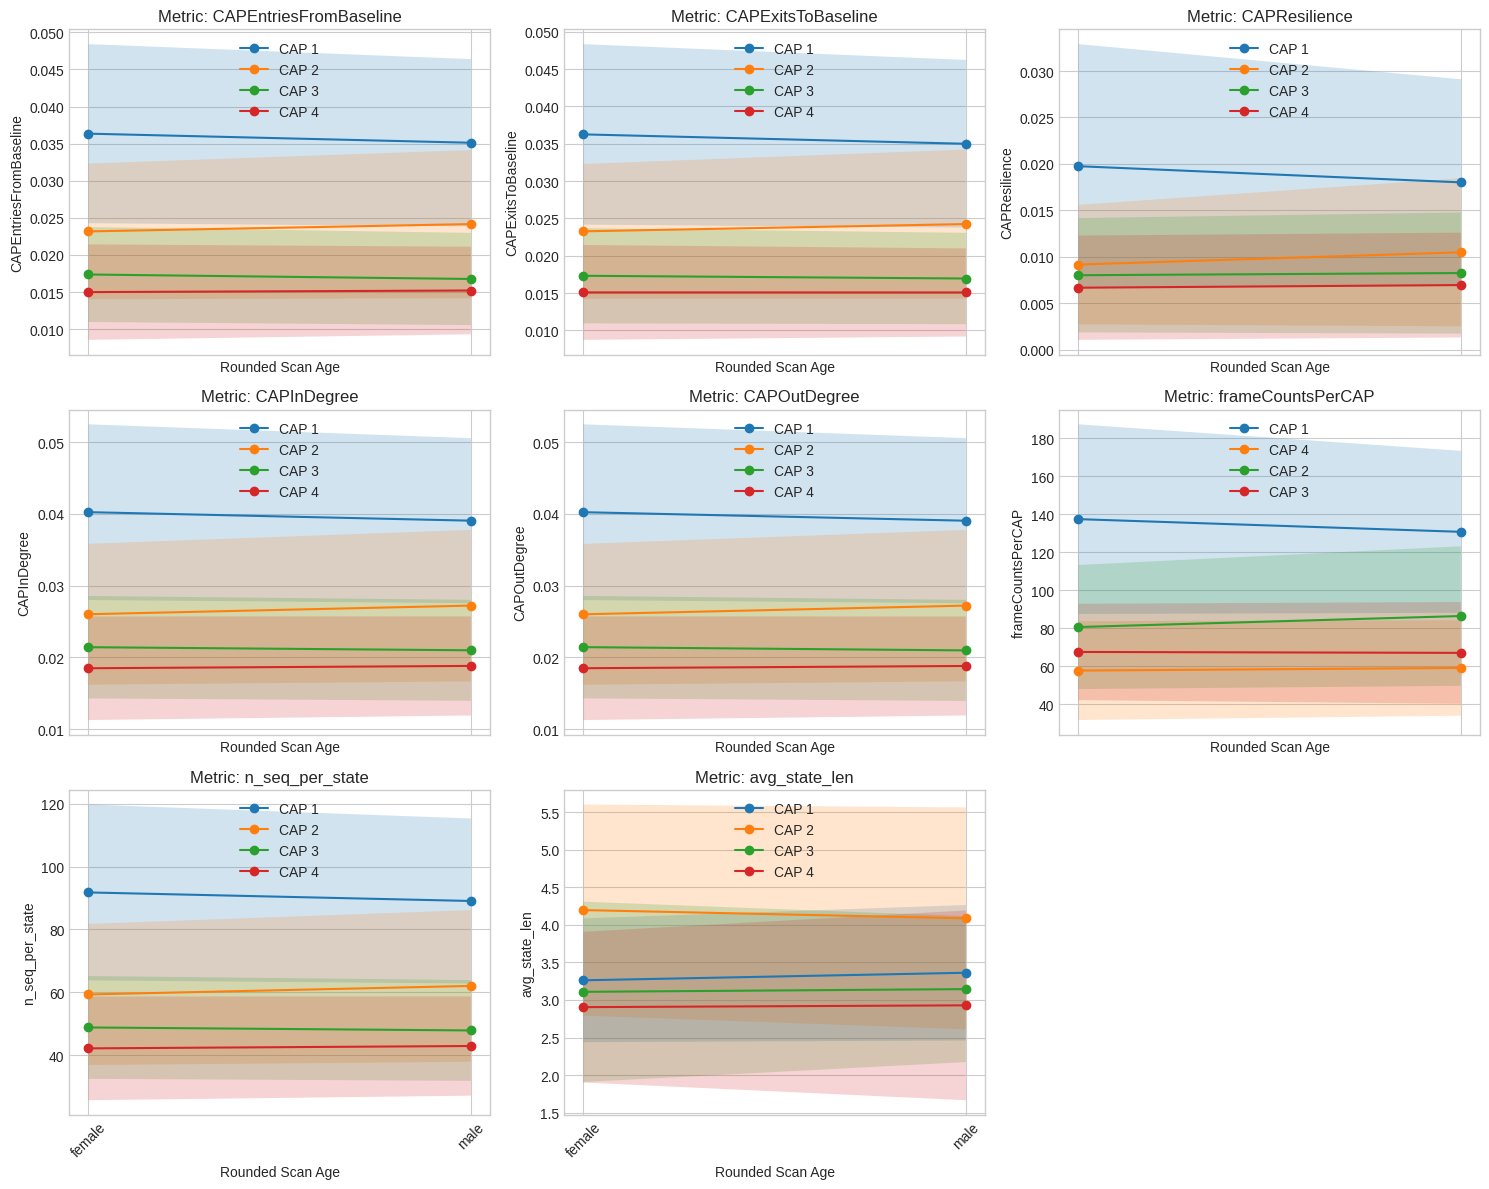

In [115]:
# I want to plot for each CAP the evolution across age groups of its metrics. 7
# each metrics needs a separate plot as the scales are different
# add a line per cap in each plot instead of a plot per cap
n_metrics = len(aggregated_data.keys())

# compute optimal n cols and rows for subplots
n_cols = int(np.ceil(np.sqrt(n_metrics)))
n_rows = int(np.ceil(n_metrics / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows), sharex=True)
axes = axes.flatten()

# hide unused axes
for ax in axes[n_metrics:]:
    ax.axis('off')


for row_idx, metric in enumerate(aggregated_data.keys()):
    ax = axes[row_idx]
    age_group_names = sorted(next(iter(aggregated_data[metric].values())).keys())
    for cap_id in aggregated_data[metric].keys():
        means = [np.mean(aggregated_data[metric][cap_id][age_group]) for age_group in age_group_names]
        stds = [np.std(aggregated_data[metric][cap_id][age_group]) for age_group in age_group_names]

        if cap_id == 0:
            # Plot baseline on secondary y-axis
            # ax2 = ax.twinx()
            # ax2.plot(age_group_names, means, marker='s', linestyle='--', color='gray', label="Baseline (CAP 0)")
            # ax2.fill_between(age_group_names,
            #                  np.array(means) - np.array(stds),
            #                  np.array(means) + np.array(stds),
            #                  color='gray', alpha=0.1)
            # ax2.set_ylabel(f"{metric} (Baseline)", color='gray')
            continue

        ax.plot(age_group_names, means, marker='o', label=f"CAP {cap_id}")
        ax.fill_between(age_group_names,
                        np.array(means) - np.array(stds),
                        np.array(means) + np.array(stds),
                        alpha=0.2)
    ax.set_title(f"Metric: {metric}")
    ax.set_xlabel("Rounded Scan Age")
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.legend()
plt.tight_layout()
plt.show()

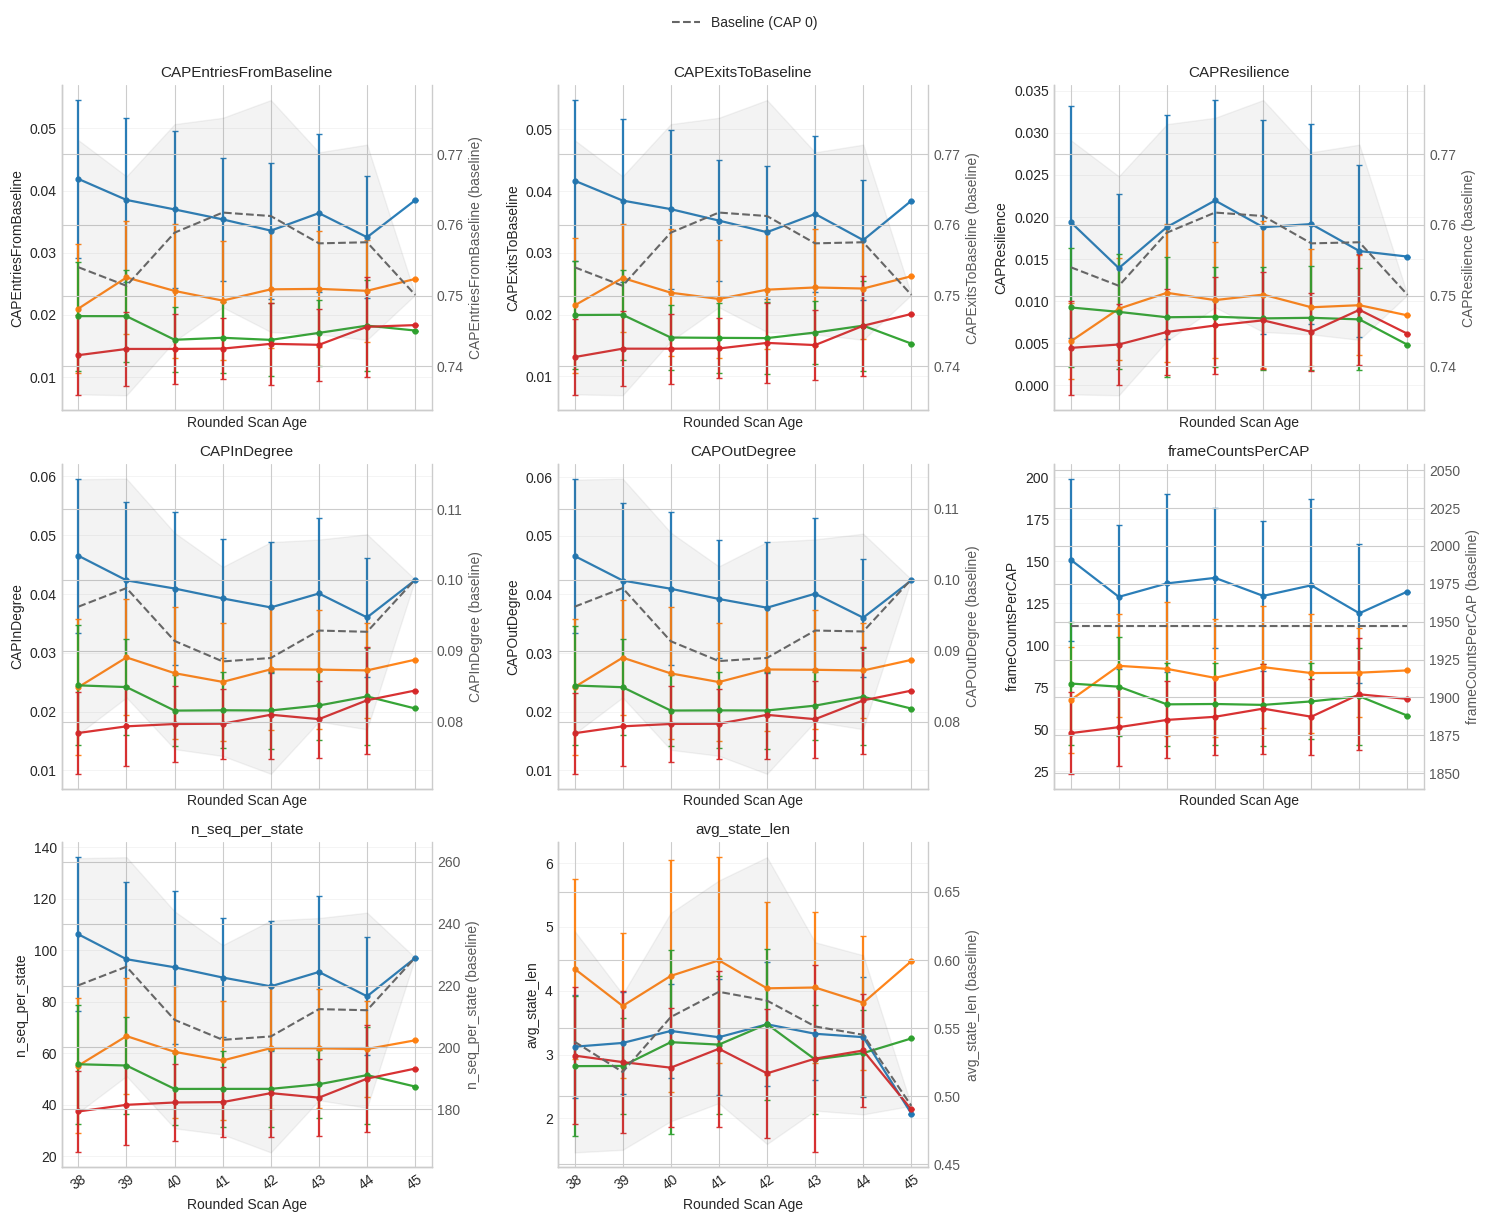

In [104]:
n_metrics = len(aggregated_data.keys())

# compute optimal n cols and rows for subplots
n_cols = int(np.ceil(np.sqrt(n_metrics)))
n_rows = int(np.ceil(n_metrics / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows), sharex=True)
axes = axes.flatten()

# hide unused axes
for ax in axes[n_metrics:]:
    ax.axis('off')

handles_for_legend = []

for row_idx, metric in enumerate(aggregated_data):
    ax = axes[row_idx]
    age_group_names = sorted(next(iter(aggregated_data[metric].values())).keys())

    # right y-axis for baseline (CAP 0)
    ax2 = ax.twinx()
    cap_ids = sorted(aggregated_data[metric].keys())

    for cap_id in cap_ids:
        means = [np.mean(aggregated_data[metric][cap_id][ag]) for ag in age_group_names]
        stds  = [np.std (aggregated_data[metric][cap_id][ag]) for ag in age_group_names]

        if cap_id == 0:
            # Baseline: dashed gray, no markers, thin band
            (line_base,) = ax2.plot(
                age_group_names, means, linestyle="--", linewidth=1.5, color="0.4", label="Baseline (CAP 0)"
            )
            ax2.fill_between(age_group_names,
                             np.array(means)-np.array(stds),
                             np.array(means)+np.array(stds),
                             alpha=0.08, color="0.4")
            if row_idx == 0:
                handles_for_legend.append(line_base)
            ax2.set_ylabel(f"{metric} (baseline)", color="0.35")
            ax2.tick_params(axis="y", colors="0.35")
            continue

        # Other CAPs: thin lines, small markers, errorbars instead of large fills
        container = ax.errorbar(
            age_group_names, means, yerr=stds, capsize=2,
            linewidth=1.6, marker="o", markersize=3.5,
            label=f"CAP {cap_id}", alpha=0.95
        )
        line_cap = container.lines[0]  # line for legend
        if row_idx == 0:
            handles_for_legend.append(line_cap)

    ax.set_title(metric, fontsize=11, pad=6)
    ax.set_xlabel("Rounded Scan Age")
    ax.set_ylabel(metric)
    ax.tick_params(axis="x", rotation=35)
    ax.grid(True, axis="y", linewidth=0.6, alpha=0.25)
    for spine in ("top", "right"):
        ax.spines[spine].set_visible(False)
    ax2.spines["top"].set_visible(False)

# one shared legend outside the grid
handles_for_legend = [h for h in handles_for_legend if not h.get_label().startswith("_")]
labels_for_legend = [h.get_label() for h in handles_for_legend]
fig.legend(
    handles_for_legend,
    labels_for_legend,
    loc="upper center",
    ncol=len(handles_for_legend),
    frameon=False,
    bbox_to_anchor=(0.5, 1.02)
)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


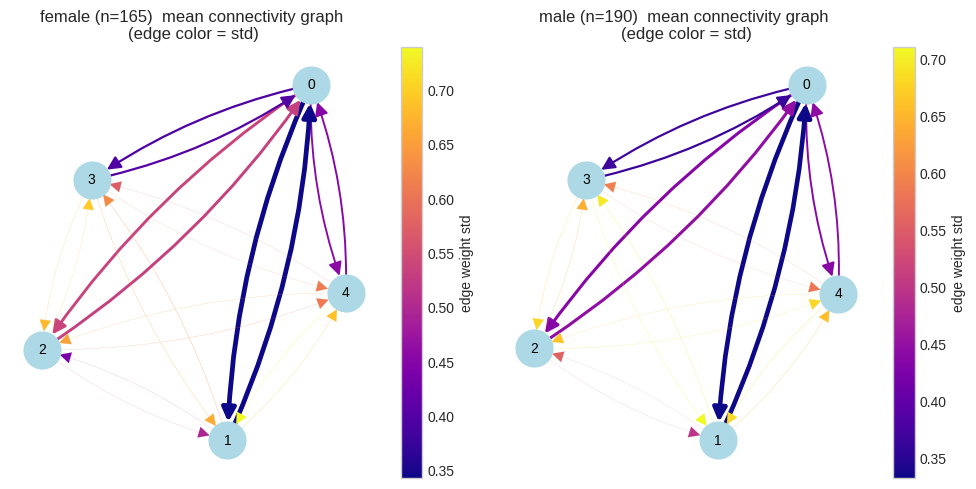

In [117]:
n_age_groups = len(age_groups)
# compute optimal n cols and rows for subplots
n_cols = int(np.ceil(np.sqrt(n_age_groups)))
n_rows = int(np.ceil(n_age_groups / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten()

# hide unused axes
for ax in axes[n_age_groups:]:
    ax.axis('off')


for age_group_idx, (age_group_name, age_group_df) in enumerate(age_groups):

    ax = axes[age_group_idx]

    graphs = [g for  g in age_group_df[("metrics", "nxGraph", 0)]]
    # build a di graph with thoses nodes, where edge distances are the mean of the edge distance between the nodes for each graph
    states = graphs[0].nodes()
    mean_graph = nx.DiGraph()
    mean_graph.add_nodes_from(states)

    for u in states:
        for v in states:
            if u == v:
                continue
            weights = []
            for g in graphs:
                if g.has_edge(u, v):
                    w = g[u][v]['weight']
                    weights.append(w)
            if weights:
                mean_weight = np.mean(weights)
                var_weight = np.std(weights) if len(weights) > 1 else 0.0
                mean_graph.add_edge(u, v, weight=mean_weight, std=var_weight)

    weights = [100*np.exp(-d['weight']) for (_, _, d) in mean_graph.edges(data=True)]
    stds = [d['std'] for (_, _, d) in mean_graph.edges(data=True)]

    norm = mcolors.Normalize(vmin=min(stds), vmax=max(stds))
    cmap = cm.plasma
    edge_colors = [cmap(norm(s)) for s in stds]

    pos = nx.spring_layout(mean_graph, seed=0)
    nx.draw(
        mean_graph, pos,
        ax=ax,
        with_labels=True,
        node_color='lightblue',
        node_size=700,
        width=weights,
        edge_color=edge_colors,
        font_size=10,
        arrowsize=20,
        connectionstyle='arc3,rad=0.1'
    )
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='edge weight std')
    ax.set_title(f"{age_group_name} (n={len(age_group_df)}) weeks PMA mean connectivity graph \n(edge color = std)")
plt.tight_layout()
plt.show()